<img src="../Pics/MLSb-T.png" width="160">
<br><br>
<center><u><H1>Single and Multiple Linear Regression</H1></u></center>

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.linear_model as lm
from sklearn import datasets

## Single Linear Regression:

In [40]:
diabetes = datasets.load_diabetes()
diabetes

{'DESCR': 'Diabetes dataset\n================\n\nNotes\n-----\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\nData Set Characteristics:\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attributes:\n    :Age:\n    :Sex:\n    :Body mass index:\n    :Average blood pressure:\n    :S1:\n    :S2:\n    :S3:\n    :S4:\n    :S5:\n    :S6:\n\nNote: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).\n\nSource URL:\nhttp://www4.stat.ncsu.edu/~boos/var.select/diabetes.html\n\nFor more information see:\nB

In [41]:
diabetes_X = diabetes.data[:, np.newaxis, 2] # all rows, new axis, Column two
diabetes_X

array([[ 0.06169621],
       [-0.05147406],
       [ 0.04445121],
       [-0.01159501],
       [-0.03638469],
       [-0.04069594],
       [-0.04716281],
       [-0.00189471],
       [ 0.06169621],
       [ 0.03906215],
       [-0.08380842],
       [ 0.01750591],
       [-0.02884001],
       [-0.00189471],
       [-0.02560657],
       [-0.01806189],
       [ 0.04229559],
       [ 0.01211685],
       [-0.0105172 ],
       [-0.01806189],
       [-0.05686312],
       [-0.02237314],
       [-0.00405033],
       [ 0.06061839],
       [ 0.03582872],
       [-0.01267283],
       [-0.07734155],
       [ 0.05954058],
       [-0.02129532],
       [-0.00620595],
       [ 0.04445121],
       [-0.06548562],
       [ 0.12528712],
       [-0.05039625],
       [-0.06332999],
       [-0.03099563],
       [ 0.02289497],
       [ 0.01103904],
       [ 0.07139652],
       [ 0.01427248],
       [-0.00836158],
       [-0.06764124],
       [-0.0105172 ],
       [-0.02345095],
       [ 0.06816308],
       [-0

## Splitting data into training/test datasets:

In [42]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

In [43]:
# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

In [44]:
# Create linear regression object
reg = lm.LinearRegression()

In [45]:
# Train the model using the training sets
reg.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
# Evaluating the model
# The coefficients
print('Coefficients: ', reg.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((reg.predict(diabetes_X_test) - diabetes_y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % reg.score(diabetes_X_test, diabetes_y_test))

('Coefficients: ', array([938.23786125]))
Mean squared error: 2548.07
Variance score: 0.47


In [47]:
from sklearn.metrics import r2_score
r2 = r2_score(diabetes_y_test, reg.predict(diabetes_X_test))
print("R2 on test data: {:.2}".format(r2))

R2 on test data: 0.47


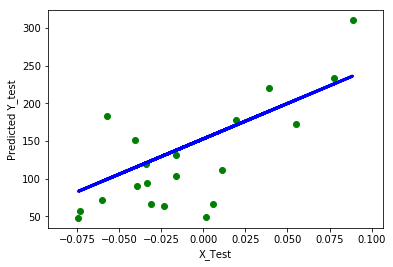

In [48]:
# Plotting data and model

plt.scatter(diabetes_X_test, diabetes_y_test,  color='green')
plt.plot(diabetes_X_test, reg.predict(diabetes_X_test), color='blue',
         linewidth=3)
plt.xlabel('X_Test')
plt.ylabel('Predicted Y_test')

plt.show()

## Homoscedasticity and Normality:
### The error variance should be constant, which is known as homocesdasticity and the error should be normally distributed.

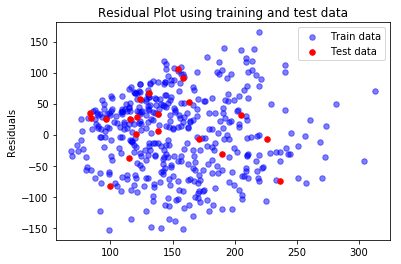

In [49]:
plt.scatter(reg.predict(diabetes_X_train), reg.predict(diabetes_X_train)-diabetes_y_train, c='b', s=30, alpha=0.5, label='Train data')
plt.scatter(reg.predict(diabetes_X_test), reg.predict(diabetes_X_test)-diabetes_y_test, c='r', s=30, label='Test data')
plt.title('Residual Plot using training and test data')
plt.ylabel('Residuals')
plt.legend(loc='best')
plt.show()

(array([0.00530203, 0.        , 0.00530203, 0.        , 0.01060405,
        0.01060405, 0.00795304, 0.00795304, 0.        , 0.00530203]),
 array([-83.43227178, -64.57155366, -45.71083555, -26.85011744,
         -7.98939932,  10.87131879,  29.7320369 ,  48.59275502,
         67.45347313,  86.31419124, 105.17490936]),
 <a list of 10 Patch objects>)

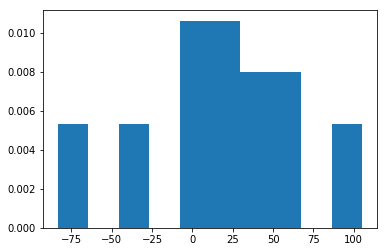

In [50]:
plt.hist(reg.predict(diabetes_X_test)-diabetes_y_test, density=True)

## Multiple Linear Regression:

In [168]:
df = pd.DataFrame.from_dict(diabetes.data)
columns = 'v0 v1 v2 v3 v4 v5 v6 v7 v8 v9'.split()
df.columns = columns
df['target'] = pd.DataFrame.from_dict(diabetes.target)
df[:1]

,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,target
0,0.038076,0.05068,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0


In [169]:
X = df[['v0', 'v1', 'v2',  
       'v3']]
y = df['target'] 

In [170]:
from sklearn import model_selection as ms
X_train, X_test, y_train, y_test = ms.train_test_split(X, y,train_size=0.8)

In [171]:
X_test.size

356

In [172]:
y_test.size

89

In [173]:
mreg = lm.LinearRegression()
mreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [174]:
y_pred=mreg.predict(X_test)

In [180]:
y_pred.size

89

In [181]:
y_test.size

89

In [176]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df[:10]

,Actual,Predicted
370,63.0,89.410740
65,163.0,150.150231
234,246.0,206.800900
110,104.0,112.500644
216,248.0,192.725478
200,158.0,112.239883
172,295.0,202.379811
296,89.0,96.420525
189,79.0,107.415304
311,180.0,165.091260


In [177]:
# Evaluating the model
# The coefficients
print('Coefficients: ', mreg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % np.mean((mreg.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % mreg.score(X_test, y_test))

('Coefficients: ', array([  41.57676803, -123.92885829,  739.27652879,  432.0120588 ]))
Mean squared error: 3665.98
Variance score: 0.43


In [178]:
r2 = r2_score(y_test, mreg.predict(X_test))
print("R2 on test data: {:.2}".format(r2))

R2 on test data: 0.43


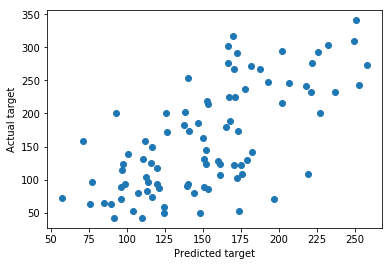

In [184]:
# plotting predictions vs actual price
plt.scatter(y_pred, y_test)

plt.xlabel('Predicted target')
plt.ylabel('Actual target')
plt.show()

In [75]:
diabetes
x_train=diabetes.data
y_train=diabetes.target
lrnew=lm.LinearRegression()
lrnew.fit(x_train,y_train)
pred = lrnew.predict(x_train)

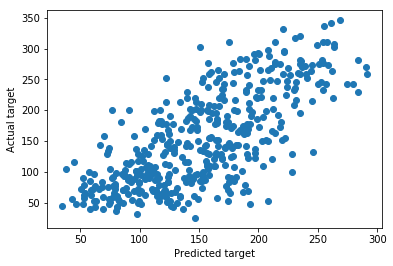

In [76]:
# plotting predictions vs actual price
plt.scatter(pred, y_train)
plt.xlabel('Predicted target')
plt.ylabel('Actual target')
plt.show()

## Reference:

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html